In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/shopping_trends.csv')
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
#check for categorical data columns
df.describe(include=['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [5]:
#count the number of missing values in each column
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
# count the number of duplcated rows
df.duplicated().sum()

0

No Duplicates or Missing Values

### Visualization

Which Gender Shops the most?

In [7]:
gender_counts = df.groupby('Gender')['Customer ID'].count().reset_index()


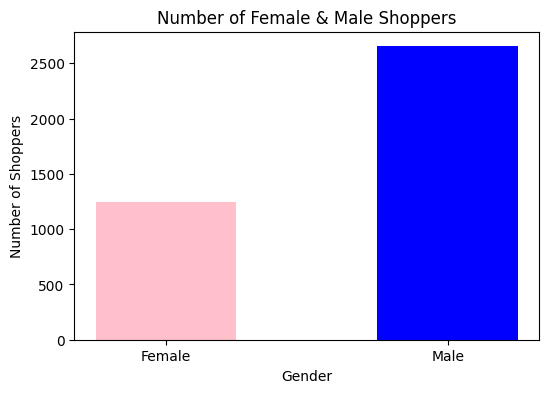

In [8]:
plt.figure(figsize=(6,4))
plt.bar(gender_counts['Gender'], gender_counts['Customer ID'], color=['pink', 'blue'], width=.5)
plt.xlabel('Gender')
plt.ylabel('Number of Shoppers')
plt.title('Number of Female & Male Shoppers')
plt.xticks(rotation=0)

plt.show()

#### What type of item is purchased the most?

In [9]:
cat = df.groupby('Category')['Item Purchased'].count().reset_index()

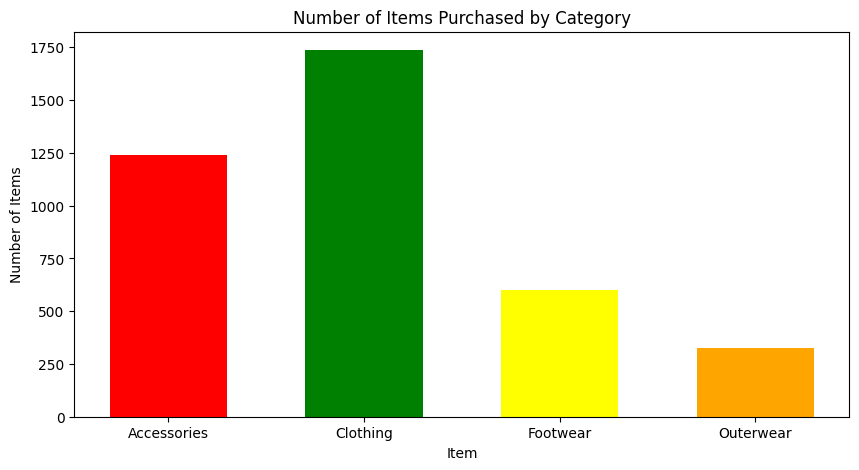

In [10]:
plt.figure(figsize=(10,5))
plt.bar(cat['Category'], cat['Item Purchased'], color=['red', 'green', 'yellow', 'orange'], width=.6)
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.title('Number of Items Purchased by Category')
plt.xticks(rotation=0)

plt.show()

#### How are sales of items distributed across the four seasons?

In [11]:
season_counts = df.groupby('Season')['Item Purchased'].count().reset_index()

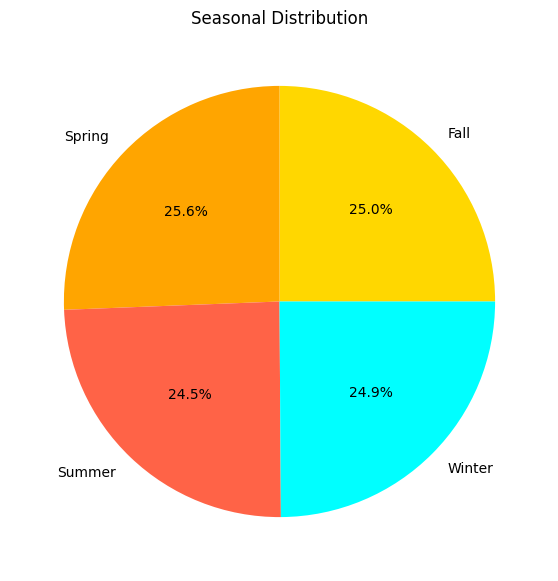

In [12]:
# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(season_counts['Item Purchased'], labels=season_counts['Season'], autopct='%1.1f%%', colors=['gold', 'orange', 'tomato', 'aqua'])

plt.title('Seasonal Distribution')
plt.ylabel('')  
plt.show()

#### Which age category shops the most?

In [13]:
df["Age Group"] = pd.cut(df["Age"], bins=[18, 30, 45, 60, 75], labels=["18-30", "31-45", "46-60", "61-75"])

C:\Users\hp\AppData\Local\Temp\ipykernel_21988\827920103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x="Age Group", y="Purchase Amount (USD)", palette="viridis", estimator=sum)


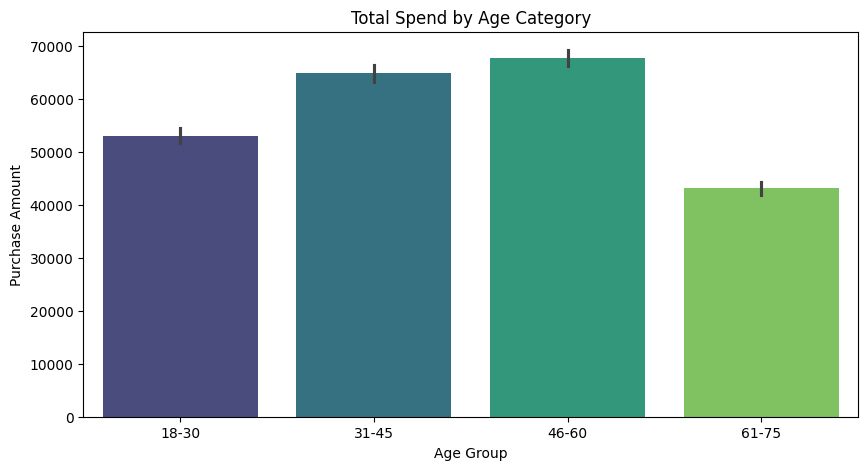

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(df, x="Age Group", y="Purchase Amount (USD)", palette="viridis", estimator=sum)
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.title('Total Spend by Age Category')
plt.xticks(rotation=0)

plt.show()

#### Which gender prefers which category?

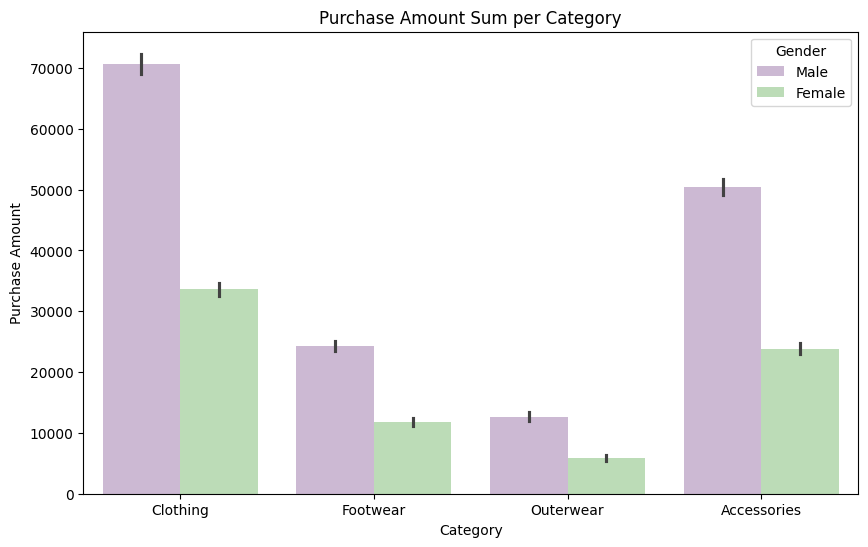

In [15]:
plt.figure(figsize = (10,6))
sns.barplot(df, x = 'Category', y = 'Purchase Amount (USD)', hue= 'Gender', palette = 'PRGn', estimator = np.sum)
plt.title("Purchase Amount Sum per Category")
plt.xlabel("Category")
plt.ylabel("Purchase Amount")

plt.show()

#### most purchased size by males & females

In [16]:
size_counts = df.groupby(['Gender', 'Size']).size().unstack()

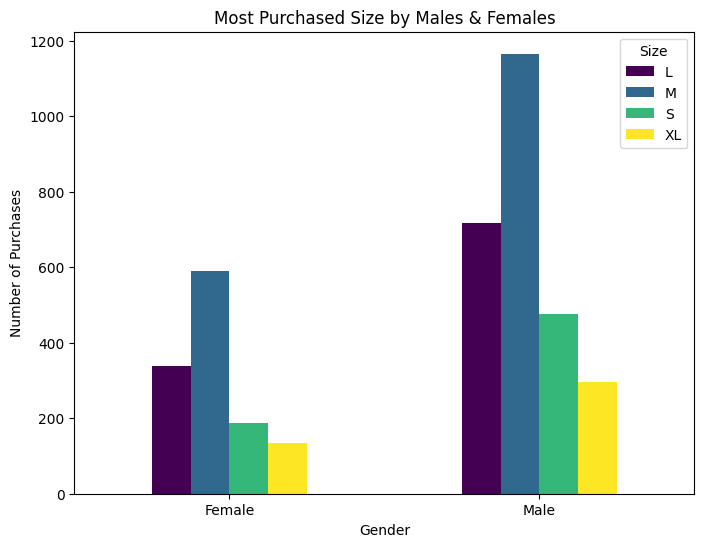

In [17]:
size_counts.plot(kind='bar', figsize=(8,6), colormap='viridis')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.title('Most Purchased Size by Males & Females')
plt.xticks(rotation=0)
plt.legend(title="Size")

plt.show()

#### Trends in color preference by season

In [18]:
color_season_counts = df.groupby(['Season', 'Color']).size().unstack()

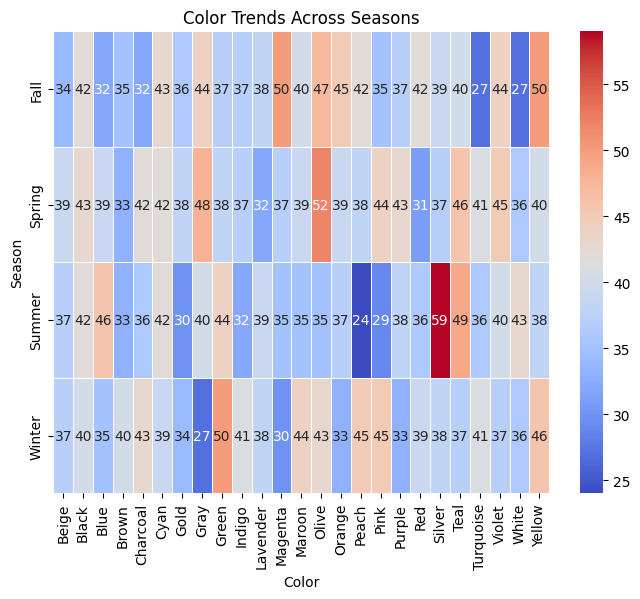

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(color_season_counts.fillna(0), cmap='coolwarm', annot=True, linewidths=0.5)

plt.title('Color Trends Across Seasons')
plt.xlabel('Color')
plt.ylabel('Season')

plt.show()

#### Trends in Item preference by season

In [20]:
item_season_counts = df.groupby(['Season', 'Item Purchased']).size().unstack()

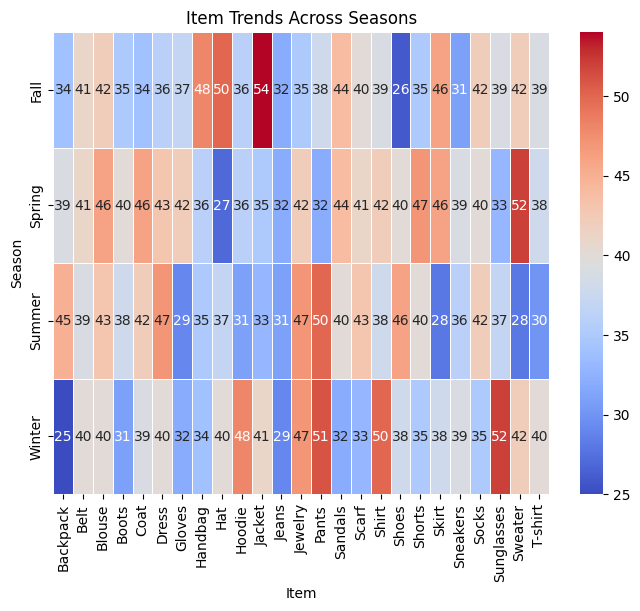

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(item_season_counts.fillna(0), cmap='coolwarm', annot=True, linewidths=0.5)

plt.title('Item Trends Across Seasons')
plt.xlabel('Item')
plt.ylabel('Season')

plt.show()

#### Customer Reviews

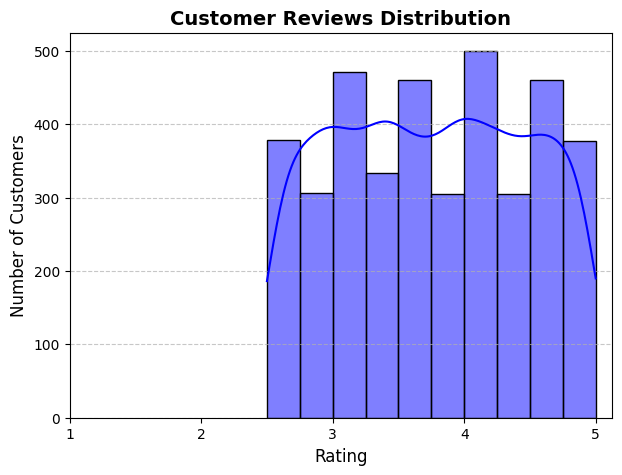

In [22]:
plt.figure(figsize=(7, 5))
sns.histplot(df["Review Rating"], bins=10, kde=True, color="blue")

plt.title("Customer Reviews Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(range(1, 6))  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()

#### Preferred Payment Method

In [24]:
payment_counts = df['Payment Method'].value_counts()


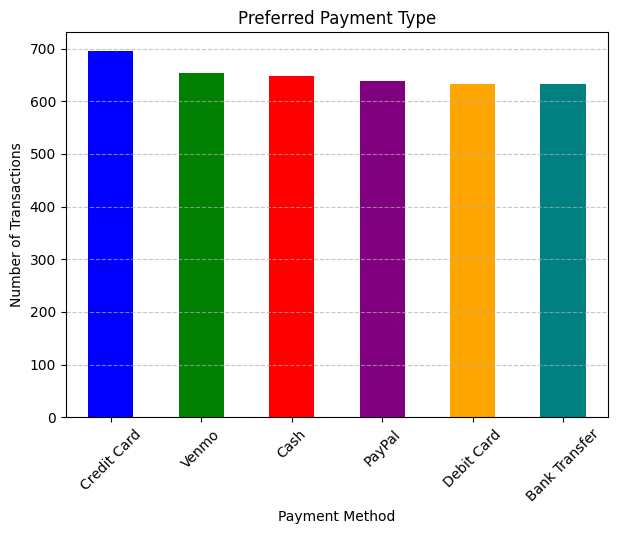

In [28]:
plt.figure(figsize=(7,5))
payment_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange', 'teal'])
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.title("Preferred Payment Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()